Задание 1

In [ ]:
#вариант 190 - Силихем-терьер
from os.path import join
#Данные изображений находятся в этой директории
image_dir = 'terriers'

#Вот несколько файлов изображений для тестирования. Мы помещаем пути к файлам в список.
image_filenames = ['terrier1.jpg',
                   'terrier2.jpg',
                   'terrier3.jpg',
                   'terrier4.jpg',
                   'not_terrier.jpg']

img_paths = [join(image_dir, filename) for filename in image_filenames ]
img_paths

['terriers/terrier1.jpg',
 'terriers/terrier2.jpg',
 'terriers/terrier3.jpg',
 'terriers/terrier4.jpg',
 'terriers/not_terrier.jpg']

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#Модель, которую мы будем использовать, была обучена на изображениях с разрешением 224x224, поэтому мы сделаем их
#такого же разрешения
image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    #Загрузим изображения с помощью функции load_img().
    #У нас есть несколько изображений, поэтому мы пока сохраняем их в списке
    #Аргумент целевого размера указывает размер или разрешение в пикселях, которыми мы хотим, чтобы изображения были, и когда мы моделируем их.
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]

    #Преобразуем каждое изображение в массив с помощью функции img_to_array().
    #Функция img_to_array() создает трехмерный тензор для каждого изображения, объединяя несколько изображений
    #Мы получаем четерхмерный тензор или массив
    img_array = np.array([img_to_array(img) for img in imgs])

    #Функция preprocess_input() выполняет некоторые арифметические действия со значениями пикселей.
    #Выходные значения стали между минус 1 и 1
    #Он возвращает предварительно обработанный массив numpy.array или tf.Tensor с типом float32.
    #Изображения преобразуются из RGB в BGR, затем центрируется каждый цветовой канал по отношению к набору данных ImageNet без масштабирования.
    output = preprocess_input(img_array)

    return(output)

In [ ]:
from tensorflow.keras.applications import ResNet50

#Мы будем использовать тип модели ResNet 50.
#Мы даем ему аргумент, указываем путь к файлу, где мы сохранили значения в сверточных фильтрах.
#Возвращаемое значение: экземпляр модели Keras.
my_model = ResNet50(weights='resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

#Вызовем эту функцию, чтобы прочитать и предварительно обработать наши данные
test_data = read_and_prep_images(img_paths)

#Получим прогнозы, вызвав метод Predict() нашей модели
#Возвращает массив коэффициентов сходства с известными категориями (например, собаки, кошки, кофе и т. д.) для каждого входного изображения.
preds = my_model.predict(test_data)

preds

FileNotFoundError: ignored

In [ ]:
#!git clone https://github.com/Kaggle/learntools.git
#!mv learntools learntools_dir
#!mv learntools_dir/learntools learntools
from learntools.deep_learning.decode_predictions import decode_predictions

#Вызовем функцию с результатами прогноза и скажите, чтобы она давала нам три верхних вероятности для каждой фотографии
most_likely_labels = decode_predictions(preds, top=3, class_list_path='resnet50/imagenet_class_index.json')

Sealyham terrier:
0.91951317


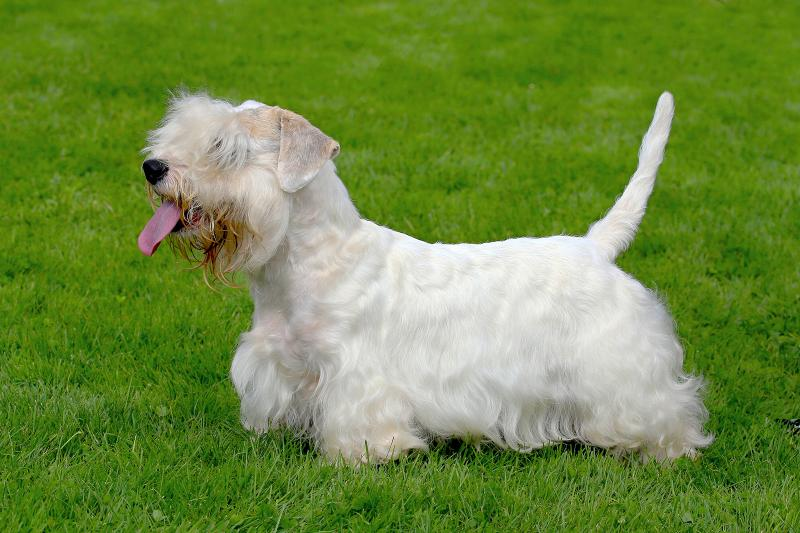

Sealyham terrier:
0.9784395


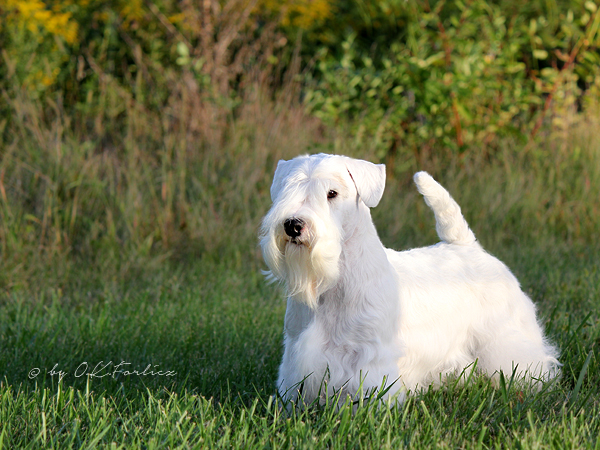

Sealyham terrier:
0.93981457


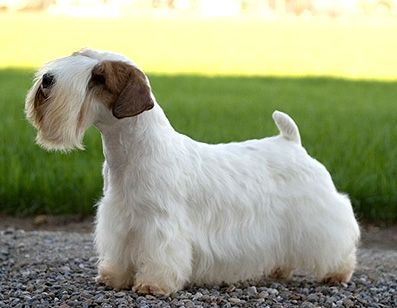

Sealyham terrier:
0.97466964


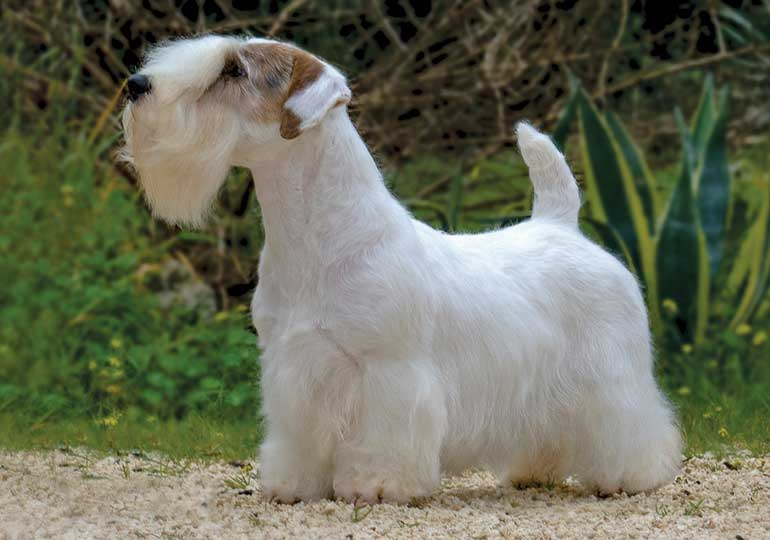

Sealyham terrier:
0.08454419


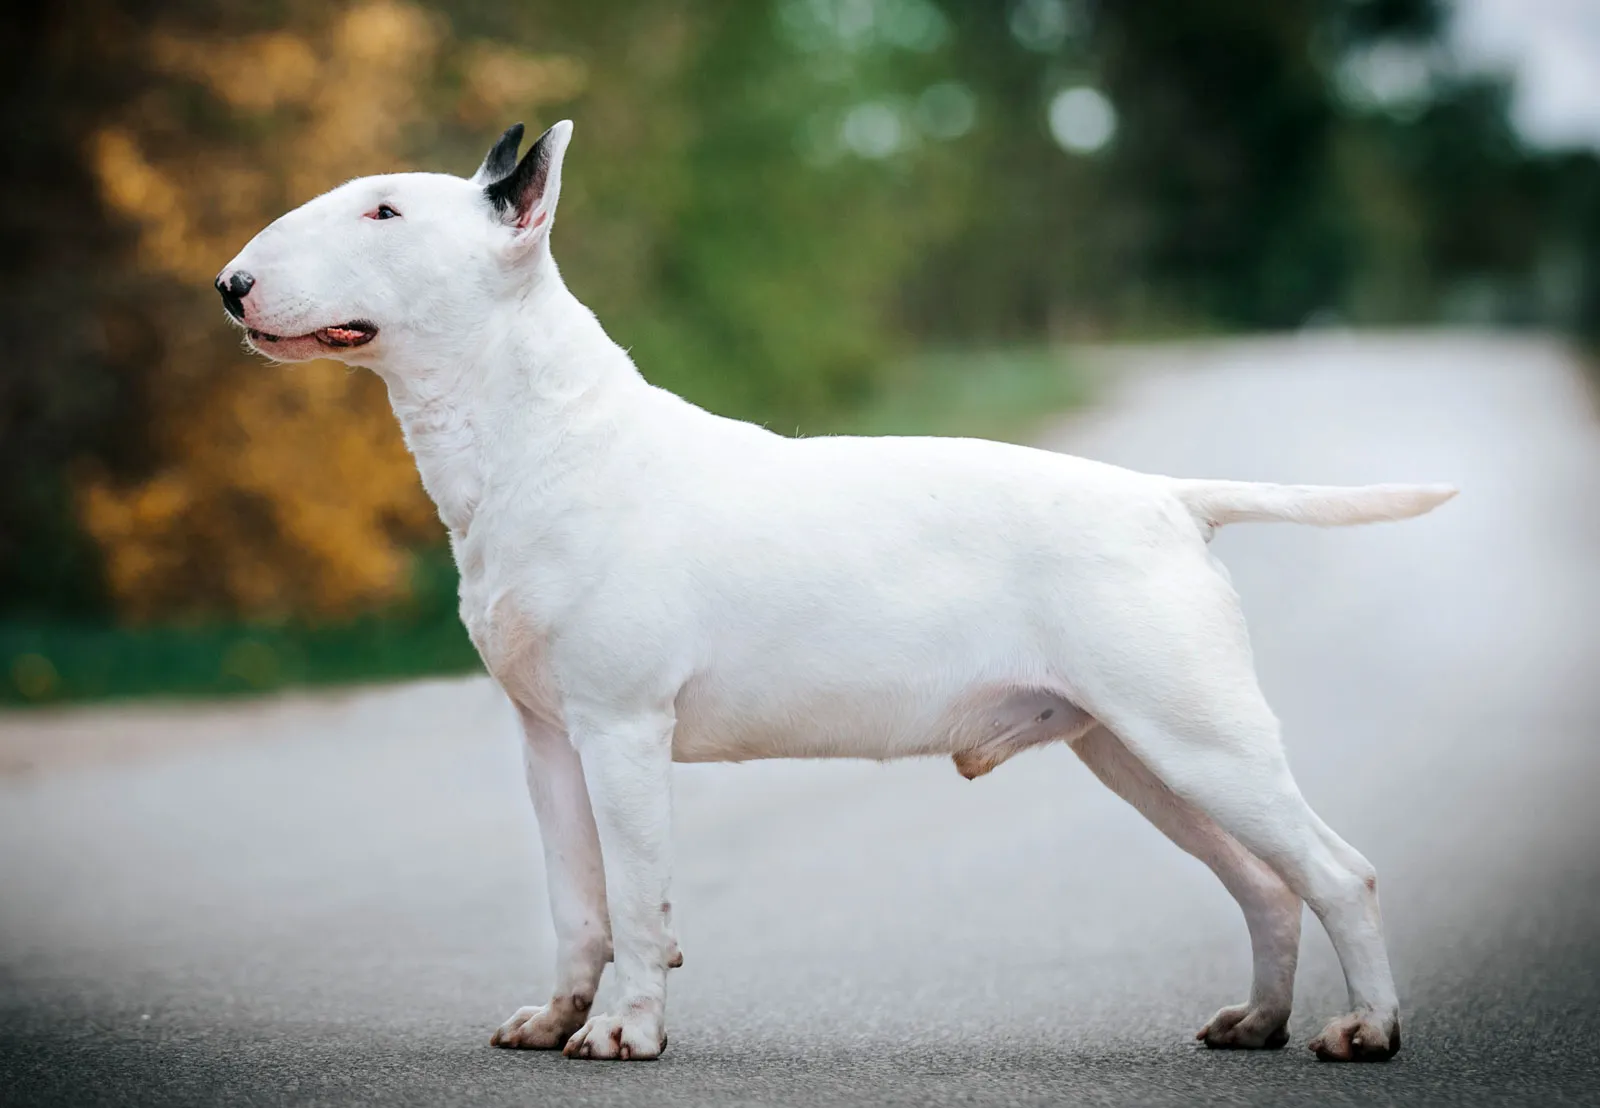

In [ ]:
from IPython.display import Image, display
for i, img_path in enumerate(img_paths):
    print("Sealyham terrier:")
    print(preds[i][190])
    display(Image(img_path))

Задание 2

In [ ]:
# Вариант 4 - мужчина/женщина
# подключение библиотек моделей
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# внесение данных о весах модели
num_classes = 3
resnet_weights_path = 'resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

# создание двух слоев модели
my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [ ]:
# компиляция модели перед дообучением
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.12.0
Num GPUs Available:  1


In [ ]:
# импорт модулей для генерации данных и дообучения модели
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# генератор данных для обучения
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# генератор обучения
train_generator = data_generator.flow_from_directory(
        'train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

# генератор валидации
validation_generator = data_generator.flow_from_directory(
        'validate',
        target_size=(image_size, image_size),
        class_mode='categorical')

# внесение результатов дообучения в нашу модель
my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)

Found 16 images belonging to 3 classes.
Found 16 images belonging to 3 classes.
3/3 [==============================] - 57s 871ms/step - loss: 0.7554 - accuracy: 0.6458 - val_loss: 0.3803 - val_accuracy: 0.8125


In [ ]:
# импорт модулей для препроцессинга изображений
from os.path import join
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# загрузка изображений под необходимый формат
image_dir = 'validate'

image_filenames = ['man/man1.jpg', 'man/man2.jpg', 'woman/woman.jpg']

img_paths = [join(image_dir, filename) for filename in image_filenames]

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [ ]:
# анализ данных
test_data = read_and_prep_images(img_paths)

preds = my_new_model.predict(test_data)
print(preds)

[[0.03141513 0.80151224 0.16707256]
 [0.04623266 0.7209672  0.23280019]
 [0.01002436 0.1306437  0.85933197]]


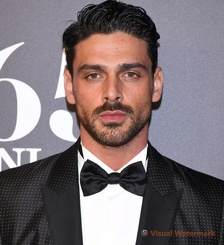

man


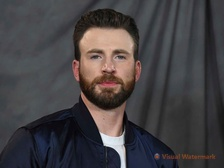

man


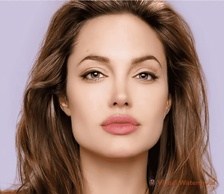

woman


In [ ]:
# вывод изображений и результатов их анализа
from IPython.display import Image, display

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    if preds[i][1] > preds[i][2]:
        prediction = 'man'
    else:
        prediction = 'woman'
    print(prediction)